# Import libraries

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Load Data From CSV File

In [2]:
df = pd.read_csv("ev_charging_patterns.csv")
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


# Visualization

## Battery Capacity vs. Energy Consumed:

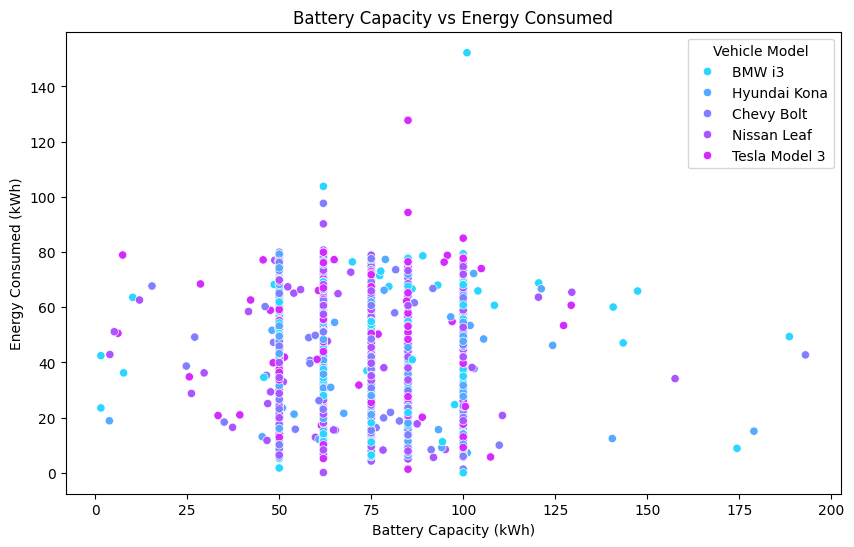

In [3]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Battery Capacity (kWh)', y='Energy Consumed (kWh)', hue='Vehicle Model', palette='cool')
plt.title('Battery Capacity vs Energy Consumed')
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Energy Consumed (kWh)')
plt.show()

## Charging Cost vs. Charging Duration:

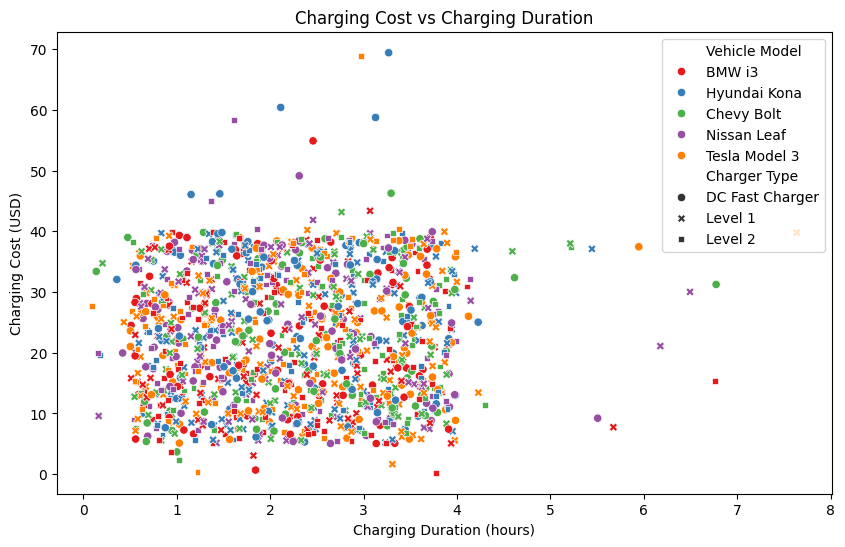

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Charging Duration (hours)', y='Charging Cost (USD)', hue='Vehicle Model', style='Charger Type', palette='Set1')
plt.title('Charging Cost vs Charging Duration')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Charging Cost (USD)')
plt.show()

## Time of Day Usage by Charging Station Location:

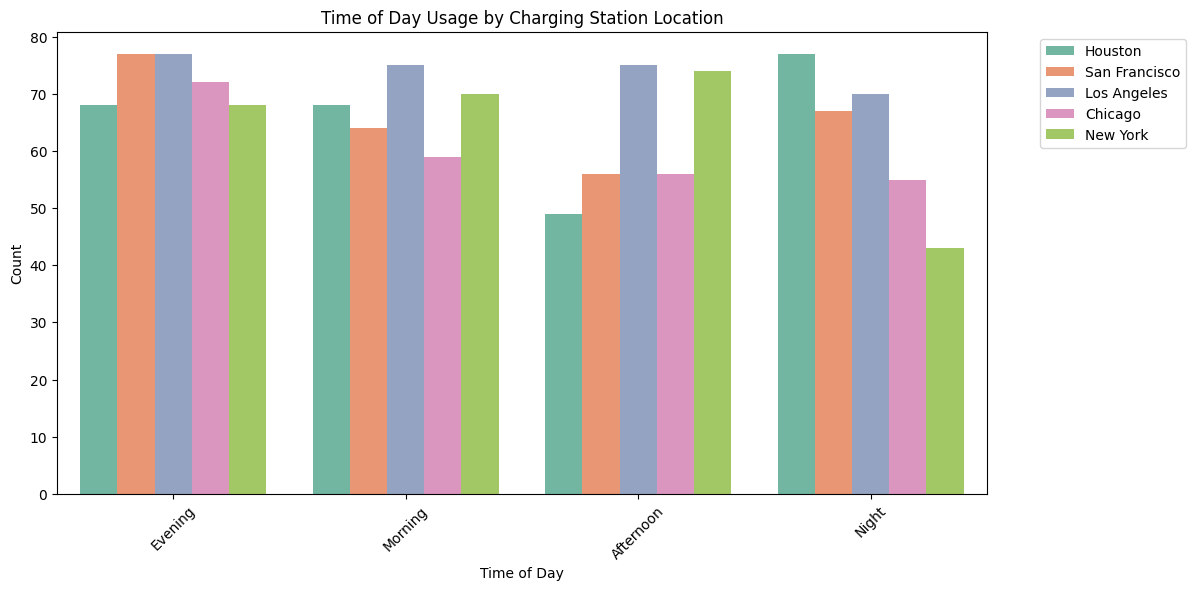

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Time of Day', hue='Charging Station Location', palette='Set2')
plt.title('Time of Day Usage by Charging Station Location')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

## State of Charge (Start %) vs. State of Charge (End %):

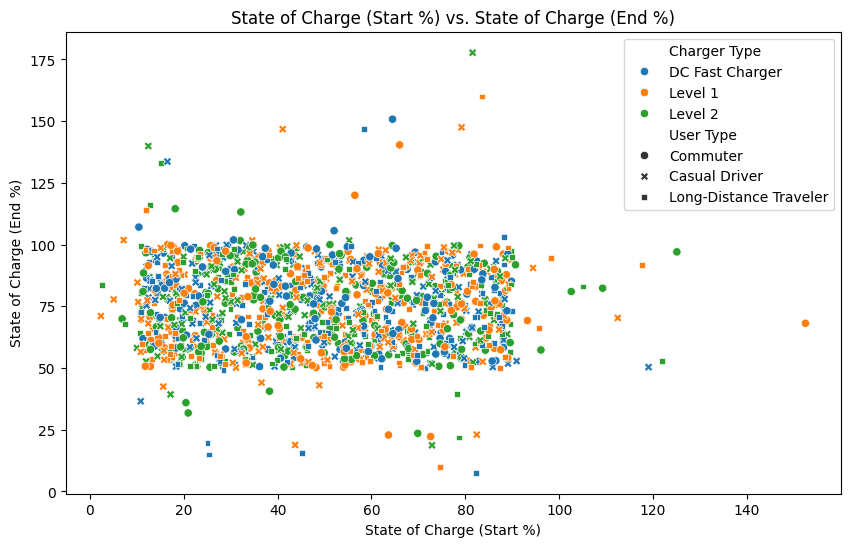

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='State of Charge (Start %)', y='State of Charge (End %)', hue='Charger Type', style='User Type', palette='tab10')
plt.title('State of Charge (Start %) vs. State of Charge (End %)')
plt.xlabel('State of Charge (Start %)')
plt.ylabel('State of Charge (End %)')
plt.show()

## Energy Consumed vs. Distance Driven (since last charge):

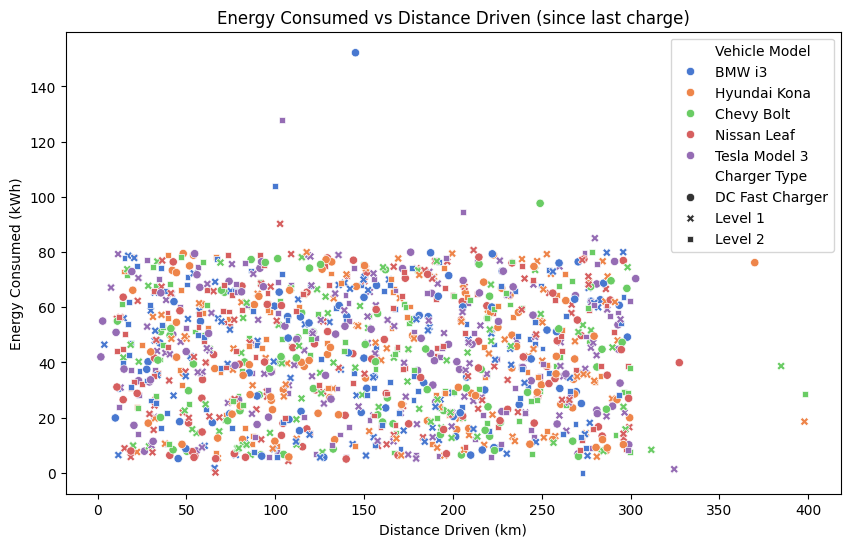

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance Driven (since last charge) (km)', y='Energy Consumed (kWh)', hue='Vehicle Model', style='Charger Type', palette='muted')
plt.title('Energy Consumed vs Distance Driven (since last charge)')
plt.xlabel('Distance Driven (km)')
plt.ylabel('Energy Consumed (kWh)')
plt.show()

## Correlation Heatmap:

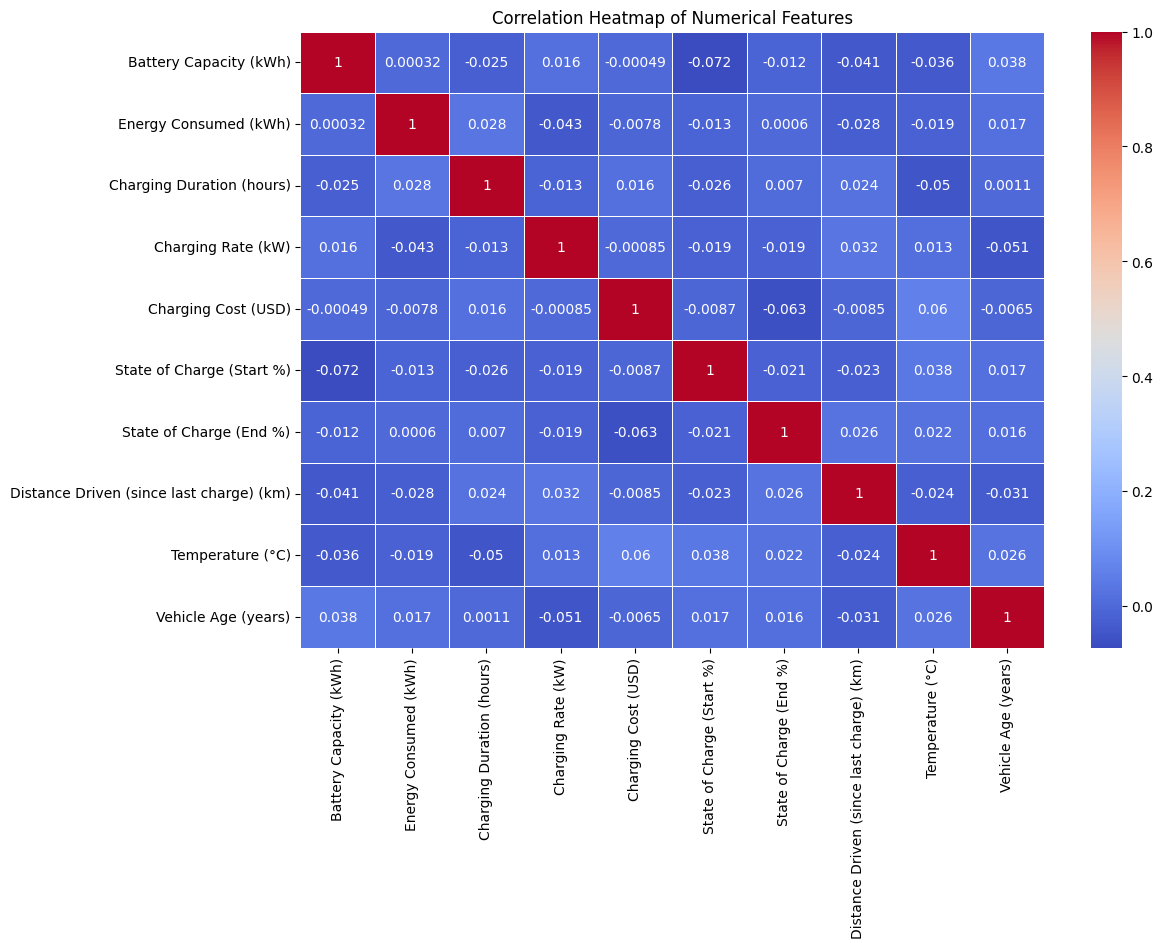

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Data Preprocessing

In [9]:
# Assuming your dataset is loaded as df
nan_count = df.isna().sum()

# Display the count of NaN values per column
print(nan_count)

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64


In [10]:
df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']] = df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)']].apply(lambda x: x.fillna(x.mean()))